In [ ]:
!pip install umap-learn

In [ ]:
import pandas
import numpy
import umap.umap_ as umap

from sklearn import decomposition
from sklearn.manifold import TSNE
from sklearn.manifold import MDS

import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.patches as mpatches

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

In [ ]:
tab = pandas.read_csv(pref_file_0, sep="\t", index_col=0)
tab['paese'] = tab['paese'].replace('KAZAKISTAN', 'KAZAKHSTAN')
first = pandas.read_table(pref_file, index_col=0)
first.head()

,LIVER,DARK_CHOCOLATE,MILK_CHOCOLATE,COFFEE,ORANGE_JUICE,LEMONS,SWEET_BREAD,RED_WINE,WHITE_WINE,BEER,...,BARLEY,BUTTER,WATERMELON,BLUEBERRY,BLACKBERRY,BANANA,RICE,BEET,WHIPPED_CREAM,MELON
id,,,,,,,,,,,,,,,,,,,,,
590597,0.103556,1.449785,-0.569558,-0.569558,1.449785,0.776671,0.776671,-1.242673,-1.242673,-1.242673,...,0.103556,0.776671,1.449785,0.776671,-1.242673,1.449785,0.103556,1.449785,-1.242673,-0.569558
591286,-1.046805,-1.721605,0.977595,0.977595,0.302795,-0.372005,0.977595,-1.046805,-1.721605,-0.372005,...,-1.721605,0.977595,0.977595,-1.046805,-1.046805,0.977595,0.977595,-1.046805,-0.372005,0.977595
591287,0.969964,0.197952,0.197952,0.969964,0.969964,0.969964,-0.574060,-0.574060,0.197952,0.197952,...,0.197952,0.197952,0.969964,-1.346073,-0.574060,0.969964,0.969964,0.969964,-0.574060,0.197952
591288,0.226483,-0.541589,0.994555,0.226483,0.994555,0.994555,0.226483,0.226483,0.226483,0.226483,...,-0.541589,0.994555,0.994555,-2.077734,-2.077734,0.994555,0.994555,0.226483,0.994555,0.994555
591289,-0.623232,1.015377,1.015377,-0.623232,1.015377,-0.623232,1.015377,1.015377,-1.169435,-1.169435,...,-1.169435,1.015377,1.015377,1.015377,1.015377,1.015377,1.015377,1.015377,-1.169435,1.015377


## MDS

In [ ]:
embedding = MDS(n_components=2)
X_embedding = embedding.fit_transform(first)

mds_df = pandas.DataFrame(data = X_embedding, 
            columns = ['DIM1', 'DIM2'])

mds_df = mds_df.set_index(first.index)

mds_df['village'] = tab['village']
mds_df['sex'] = tab['sex']
mds_df['paese'] = tab['paese']


In [ ]:
def mds_and_plot(mds_df, column, ax=None, save='no', colors=None):
    sns.scatterplot( x="DIM1", y="DIM2",
      data=mds_df,  
      hue=column,
      legend=False, ax = ax, palette=colors, edgecolor="black", alpha=0.9), 
    if False:
        if save == 'no':
            plt.show()
            plt.close()
        elif save == 'yes':
            name=fooname = nameof(df)
            plt.savefig('mds.pdf')
            plt.close()

# tSNE

In [ ]:
projection = TSNE(learning_rate=50).fit_transform(first) 
tsne_df = pandas.DataFrame(data = projection , 
        columns = ['DIM1', 'DIM2'])
tsne_df = tsne_df.set_index(first.index)

tsne_df['village'] = tab['village']
tsne_df['sex'] = tab['sex']
tsne_df['paese'] = tab['paese']

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [ ]:
def tSNE_and_plot(tsne_df, column, ax=None, save='no', colors=None):
    sns.scatterplot( x="DIM1", y="DIM2",
      data=tsne_df,  
      hue=column,
      legend=False,ax = ax, palette=colors, edgecolor="black", alpha=0.9) 
    if False:
        if save == 'no':
            plt.show()
            plt.close()
        elif save == 'yes':
            name=fooname = nameof(df)
            plt.savefig('tsne.pdf')
            plt.close()
        #plt.show()

# PCA

In [ ]:
pca = decomposition.PCA()
pc = pca.fit_transform(first)
pc_df = pandas.DataFrame(data = pc)

pc_df = pc_df.set_index(first.index)
pc_df['village'] = tab['village']
pc_df['sex'] = tab['sex']
pc_df['paese'] = tab['paese']
pc_df['age'] = tab['age']

In [ ]:
def PCA_and_plot(pc_df, column, ax=None, colors=None):
   
    sns.scatterplot( x=0, y=1,
      data=pc_df,  
      hue=column,
      legend=False, ax = ax, palette=colors, edgecolor="black", alpha=0.9) 


# UMAP

In [ ]:
trans = umap.UMAP(n_neighbors=15, random_state=42).fit(first)
#sns.set(font_scale=1)
umap_df = pandas.DataFrame(trans.embedding_[:, 0], index=first.index, columns=['DIM1'])
umap_df['DIM2'] = trans.embedding_[:, 1]

umap_df = umap_df.set_index(first.index)
umap_df['village'] = tab['village']
umap_df['sex'] = tab['sex']
umap_df['paese'] = tab['paese']

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
def umap_and_plot(umap_df, column, ax=None, save='no',colors=None):
 
    sns.scatterplot( x='DIM1', y='DIM2',
      data=umap_df,  
      hue=column,
      legend=False, ax=ax, palette=colors, edgecolor="black", alpha=0.9) 

    if False:
        if save == 'no':
            plt.show()
            plt.close()
        elif save == 'yes':
            plt.savefig('umap.pdf')
            plt.close()
        #return g

In [ ]:
def umap_and_plot_legend(umap_df, column, ax=None, save='no', colors=None):
    
    ax = sns.scatterplot( x='DIM1', y='DIM2',
      data=umap_df,  
      hue=column,
      legend="full", ax=ax, palette=colors, edgecolor='black') 
      #palette="tab20")
      #palette = sns.color_palette("tab10"))
    
    handles, labels = ax.get_legend_handles_labels()
    #return handles[1:], labels[1:]
    return handles, labels
    #return g

# PLOT:

In [ ]:
countries = ['ARMENIA', 'GEORGIA', 'AZERBAIJAN', 'KAZAKHSTAN','TAJIKISTAN', 'UZBEKISTAN']
my_colors=["#e41a1c", "#377eb8",  "#4daf4a", "#984ea3", "#ff7f00", "#ffff33"]
pal = dict(zip(countries, sns.color_palette(my_colors)))
#sns.set_palette(sns.color_palette(my_colors))
pal

{'ARMENIA': (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 'AZERBAIJAN': (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 'GEORGIA': (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 'KAZAKHSTAN': (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 'TAJIKISTAN': (1.0, 0.4980392156862745, 0.0),
 'UZBEKISTAN': (1.0, 1.0, 0.2)}

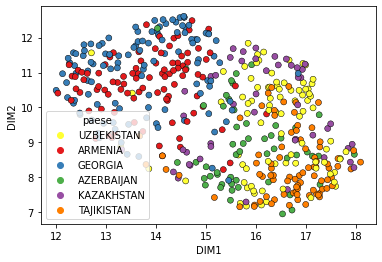

In [ ]:
# get legend
handles, labels = umap_and_plot_legend(umap_df, 'paese', save='no', colors=pal)

In [ ]:
labels

['UZBEKISTAN', 'ARMENIA', 'GEORGIA', 'AZERBAIJAN', 'KAZAKHSTAN', 'TAJIKISTAN']

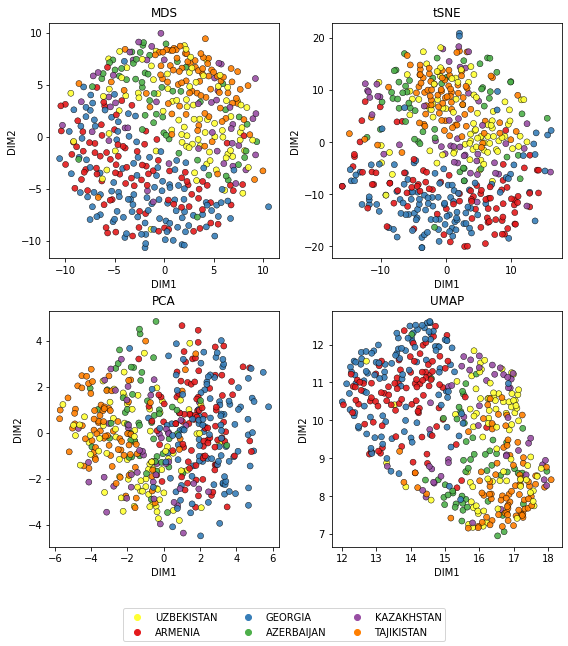

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8,9))
mds_and_plot(mds_df, 'paese', save='no', ax=axs[0,0], colors=pal)
axs[0, 0].set_title('MDS')
tSNE_and_plot(tsne_df, 'paese', save='no', ax=axs[0,1], colors=pal)
axs[0, 1].set_title('tSNE')
PCA_and_plot(pc_df, 'paese', ax=axs[1,0], colors=pal)
axs[1, 0].set_title('PCA')
umap_and_plot(umap_df, 'paese', save='no', ax=axs[1, 1], colors=pal)
axs[1, 1].set_title('UMAP')

for ax in axs.flat:
    ax.set(xlabel='DIM1', ylabel='DIM2')

fig.legend(handles, labels, loc='lower center', ncol=3)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
#plt.savefig('dimensionality_reduction.pdf', bbox_inches='tight')
#plt.close()
plt.show()
plt.close()
#, bbox_to_anchor=(0.5, -0.02)

In [ ]:
sex = [0, 1]
my_colors=["#e41a1c", "#377eb8"]
pal_sex = dict(zip(sex, sns.color_palette(my_colors)))
#sns.set_palette(sns.color_palette(my_colors))

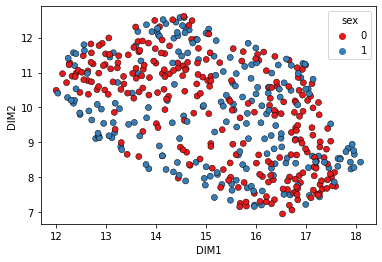

In [ ]:
# get legend
handles, labels = umap_and_plot_legend(umap_df, 'sex', save='no', colors=pal_sex)
labels = ['Females', 'Males']

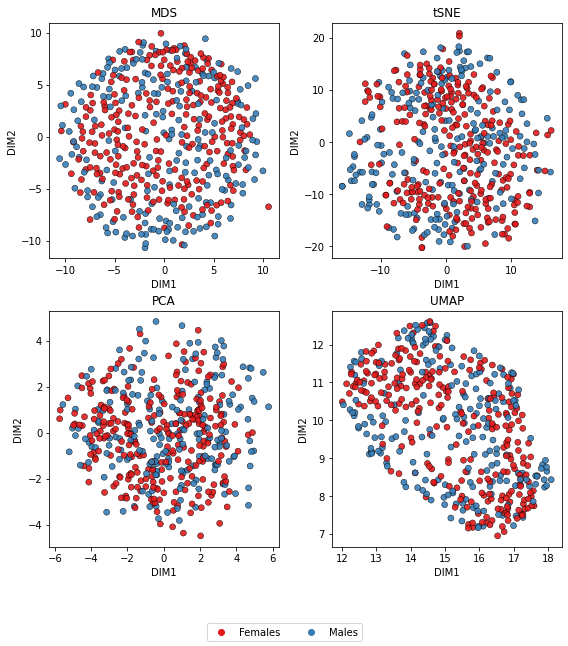

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8,9))
mds_and_plot(mds_df, 'sex', save='no', ax=axs[0,0], colors=pal_sex)
axs[0, 0].set_title('MDS')
tSNE_and_plot(tsne_df, 'sex', save='no', ax=axs[0,1], colors=pal_sex)
axs[0, 1].set_title('tSNE')
PCA_and_plot(pc_df, 'sex', ax=axs[1,0], colors=pal_sex)
axs[1, 0].set_title('PCA')
umap_and_plot(umap_df, 'sex', save='no', ax=axs[1, 1], colors=pal_sex)
axs[1, 1].set_title('UMAP')

for ax in axs.flat:
    ax.set(xlabel='DIM1', ylabel='DIM2')

fig.legend(handles, labels, loc='lower center', ncol=2)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
#plt.savefig('dimensionality_reduction_sex.pdf', bbox_inches='tight')
#plt.close()
plt.show()
plt.close()